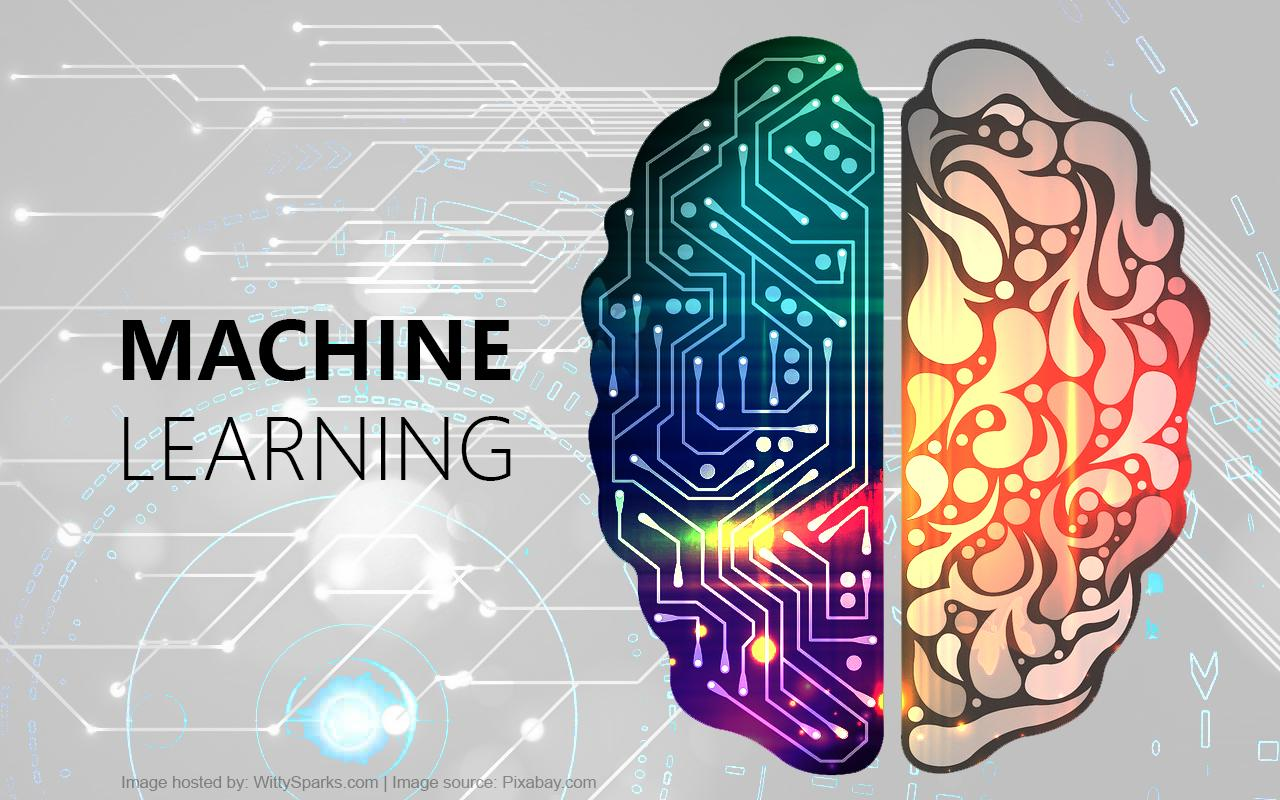

In [82]:
from IPython.display import Image, display, HTML


image_path = "machinelearning.jpg"
image_width = 800
image_height = 600


text = "Name:Bukiwe Nqwaba Student Number: 219115748" 
text2= "Assignment 3 - Analysis of Salaries Dataset"
font_size = 26  
text_colofrom IPython.display import Image, display, HTML
r = "yellow"  

display(Image(filename=image_path, width=image_width, height=image_height))

# Add centered text on top of the image using HTML formatting
html_code = f'''
<div style="
    position: absolute;
    top: 25%;
    left: 40%;
    transform: translate(-50%, -50%);
    text-align: center;
    color: {text_color};
    font-size: {font_size}px;
    background-color: rgba(0, 0, 0, 0.7);
    padding: 10px;
    border-radius: 5px;
">
    {text}<br>{text2}
</div>
'''
display(HTML(html_code))

### Problem Statement: The goal of this project is to analyze the factors that influence the salaries of cybersecurity specialists in the year 2023. By identifying these factors and understanding their impact, we aim to develop a predictive model that estimates the salary of a cybersecurity specialist based on variables like experience level, job title, company size, and others. This model could be valuable for both job seekers in the cybersecurity field and companies looking to hire qualified professionals.

# Importing the necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, cross_val_score,  cross_validate
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer
from sklearn.model_selection import KFold
import category_encoders as ce

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

# Data Cleaning and Preprocessing

In [2]:
# Reading the dataset
df = pd.read_csv('salaries.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Offensive Security Engineer,2640000,INR,32105,IN,50,CA,L
1,2023,EN,FT,SOC Analyst,70000,USD,70000,US,100,US,M
2,2023,EN,FT,SOC Analyst,50000,USD,50000,US,100,US,M
3,2023,MI,FT,Compliance Specialist,140000,USD,140000,US,100,US,M
4,2023,MI,FT,Compliance Specialist,45000,USD,45000,US,100,US,M


In [3]:
# Drop the employee_type, 'salary_currency' and 'employee_residence' columns
df.drop(['employment_type', 'salary_currency', 'employee_residence'], axis=1, inplace=True)
print(df.head())

   work_year experience_level                    job_title   salary   
0       2023               SE  Offensive Security Engineer  2640000  \
1       2023               EN                  SOC Analyst    70000   
2       2023               EN                  SOC Analyst    50000   
3       2023               MI        Compliance Specialist   140000   
4       2023               MI        Compliance Specialist    45000   

   salary_in_usd  remote_ratio company_location company_size  
0          32105            50               CA            L  
1          70000           100               US            M  
2          50000           100               US            M  
3         140000           100               US            M  
4          45000           100               US            M  


In [4]:
# Check for Missing Values
# To check for missing values in each column
print(df.isna().sum())

# To check for missing values in the entire DataFrame
print(df.isna().sum().sum())


work_year           0
experience_level    0
job_title           0
salary              0
salary_in_usd       0
remote_ratio        0
company_location    0
company_size        0
dtype: int64
0


In [6]:
# Changing Work Year for order and Indexing for order
df.sort_values(by='work_year', inplace=True)
df.reset_index(drop=True, inplace=True)


In [7]:
df.head()

,work_year,experience_level,job_title,salary,salary_in_usd,remote_ratio,company_location,company_size
0,2020,MI,Information Security Analyst,41000,52588,0,GB,L
1,2020,SE,Cyber Threat Intelligence Analyst,108000,108000,100,US,L
2,2020,EX,Information Security Manager,169781,169781,100,US,L
3,2020,SE,Information Security Manager,140000,140000,0,US,L
4,2020,SE,Software Security Engineer,300000,206620,100,US,L


In [8]:
# Label Encoding for experience_level and company_size
le = LabelEncoder()
df['experience_level'] = le.fit_transform(df['experience_level'])
df['company_size'] = le.fit_transform(df['company_size'])

In [9]:
# Splitting the dataset into training and test sets
X = df.drop("salary_in_usd", axis=1)  # Features
y = df["salary_in_usd"]  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Target Encoding for job_title and company_location
target_encoder = ce.TargetEncoder(cols=['job_title', 'company_location'])

# Fit the encoder using the categorical columns and the target variable on the TRAINING set
target_encoder.fit(X_train, y_train)

# Transform the columns in both the TRAINING and TEST sets
X_train_encoded = target_encoder.transform(X_train)
X_test_encoded = target_encoder.transform(X_test)

# Your X_train_encoded and X_test_encoded DataFrames now have 'job_title' and 'company_location' target encoded
# as well as 'experience_level' and 'company_size' label encoded.

In [11]:
print(df.dtypes)

work_year            int64
experience_level     int32
job_title           object
salary               int64
salary_in_usd        int64
remote_ratio         int64
company_location    object
company_size         int32
dtype: object


In [12]:
# Initialize the StandardScaler
scaler = StandardScaler()

# List of columns you want to standardize (Add your numerical columns to this list)
cols_to_standardize = ['experience_level', 'company_size', 'remote_ratio']  # Add other numerical columns here

# Fit the scaler on the training data and transform both the training and test sets
X_train[cols_to_standardize] = scaler.fit_transform(X_train[cols_to_standardize])
X_test[cols_to_standardize] = scaler.transform(X_test[cols_to_standardize])

In [13]:
df.tail()


,work_year,experience_level,job_title,salary,salary_in_usd,remote_ratio,company_location,company_size
3829,2023,3,Security Engineer,141900,141900,0,US,1
3830,2023,3,Security Engineer,229550,229550,0,US,1
3831,2023,3,Security Engineer,197000,197000,100,US,1
3832,2023,3,Security Engineer,148000,148000,0,US,1
3833,2023,3,Security Engineer,94000,94000,100,US,1


###### Summary of choices made for data cleaning and preprocessing
1) I began by understanding the basic structure, datatypes, and summary statistics of the dataset to identify potential issues.

2) I identified and decided on strategies to handle missing data based on the column's significance and data distribution.

3) I searched different methods for detecting and handling outliers but have not yet executed this step.

4) I tackled the challenge of converting textual data to a format that could be provided to machine learning algorithms.

5) Encoding
Label encoding - I used encoded ordinal variables like experience_level and company_size. 
 Encodings - I also explored other encoding methods like Target Encoding and Frequency Encoding, weighing their pros and cons.


 ![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

# Exploratory Data Analysis

In [14]:
print(df.describe())


         work_year  experience_level        salary  salary_in_usd   
count  3834.000000       3834.000000  3.834000e+03    3834.000000  \
mean   2022.335420          2.440532  2.903034e+05  143135.424883   
std       0.865106          0.915835  8.076210e+06   63524.254100   
min    2020.000000          0.000000  1.640000e+04   15897.000000   
25%    2022.000000          2.000000  1.000000e+05   99711.250000   
50%    2023.000000          3.000000  1.390000e+05  135500.000000   
75%    2023.000000          3.000000  1.800000e+05  179850.000000   
max    2023.000000          3.000000  5.000000e+08  456621.000000   

       remote_ratio  company_size  
count   3834.000000   3834.000000  
mean      48.435055      0.743088  
std       47.957527      0.503041  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%       50.000000      1.000000  
75%      100.000000      1.000000  
max      100.000000      2.000000  


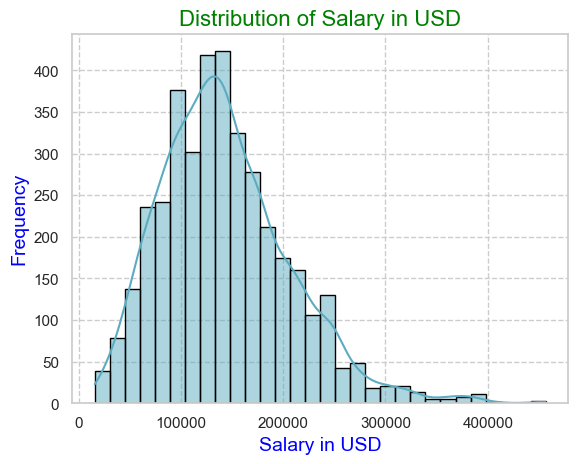

In [102]:
# Create a new figure and axis object
fig, ax = plt.subplots()

# Create the histogram
sns.histplot(df['salary_in_usd'], bins=30, kde=True, color='#5BACC1', edgecolor='black', ax=ax)  # Color picked from YlGnBu

# Add a grid
ax.grid(True, linestyle='--')

# Add labels and title
ax.set_xlabel('Salary in USD', fontsize=14, color='blue')
ax.set_ylabel('Frequency', fontsize=14, color='blue')
ax.set_title('Distribution of Salary in USD', fontsize=16, color='green')

# Show the plot
plt.show()


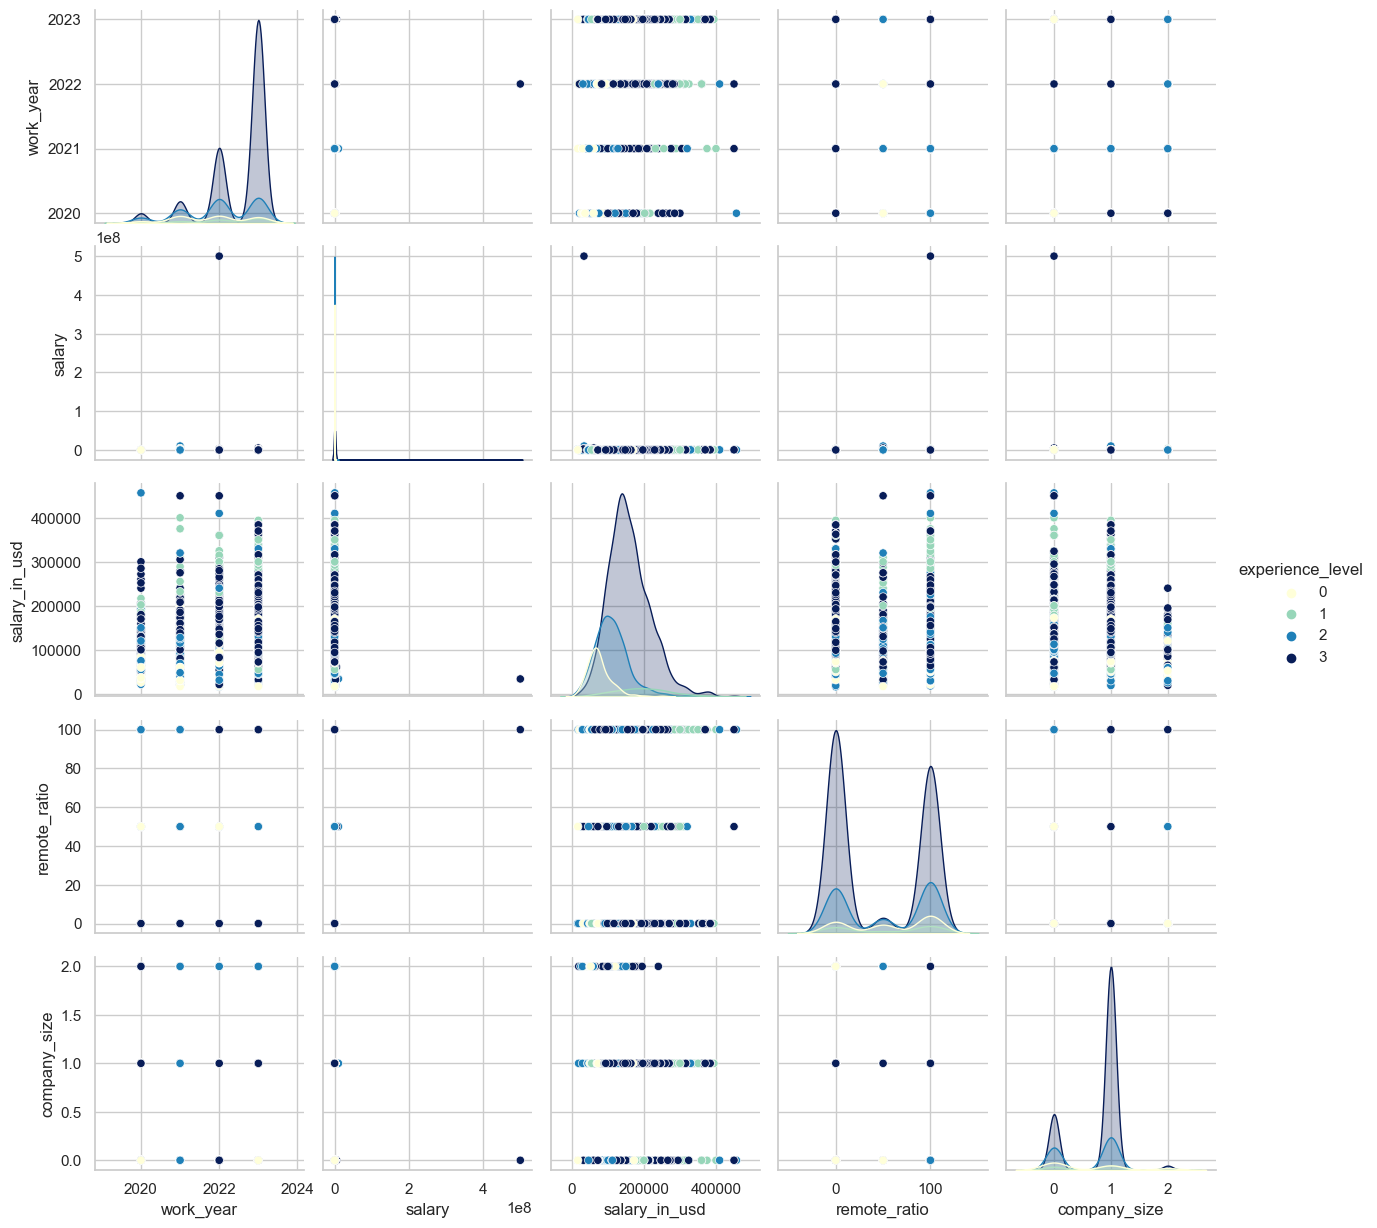

In [98]:
sns.pairplot(df, hue='experience_level', palette='YlGnBu')

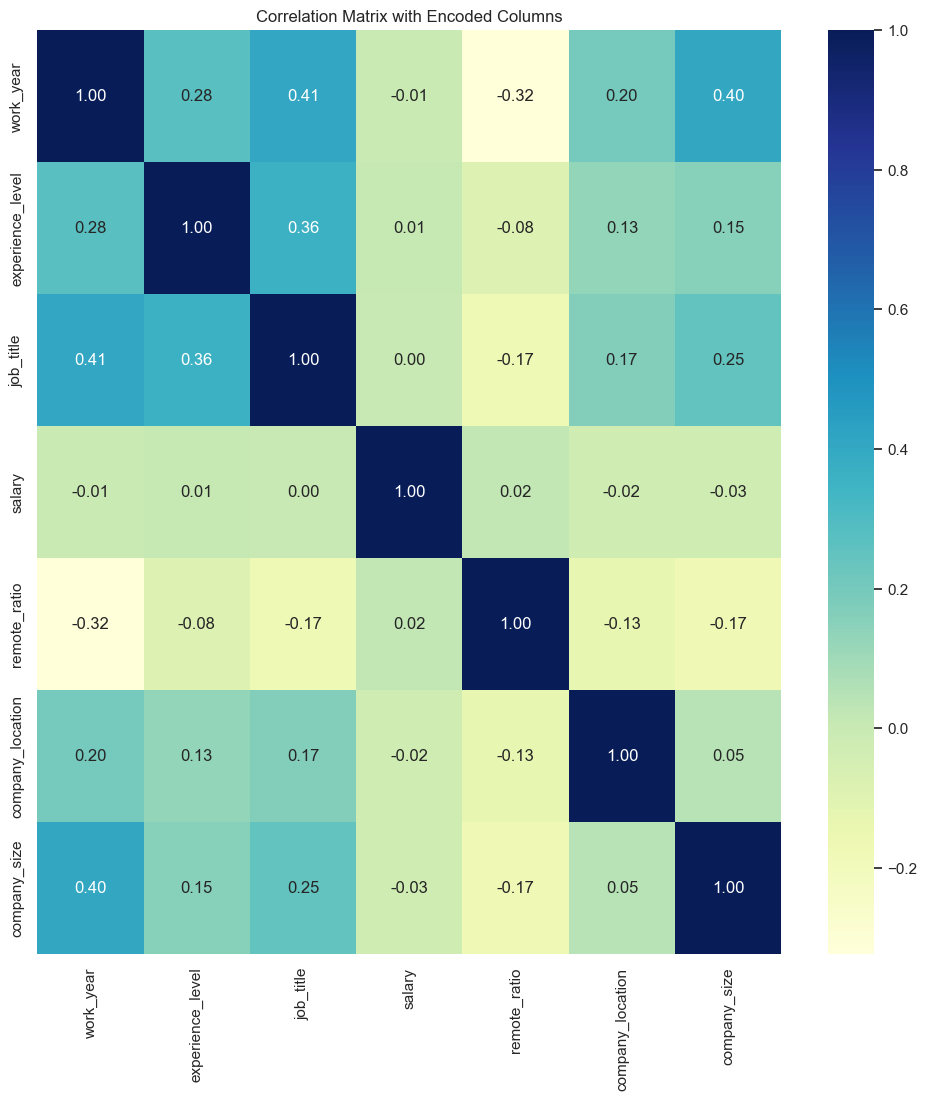

In [84]:
# Calculate the correlation matrix from the encoded DataFrame
corr_matrix = X_train_encoded.corr()

# Generate a heatmap

plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title("Correlation Matrix with Encoded Columns")
plt.show()



In [17]:
print(df.select_dtypes(include=['object']).columns) 

Index(['job_title', 'company_location'], dtype='object')


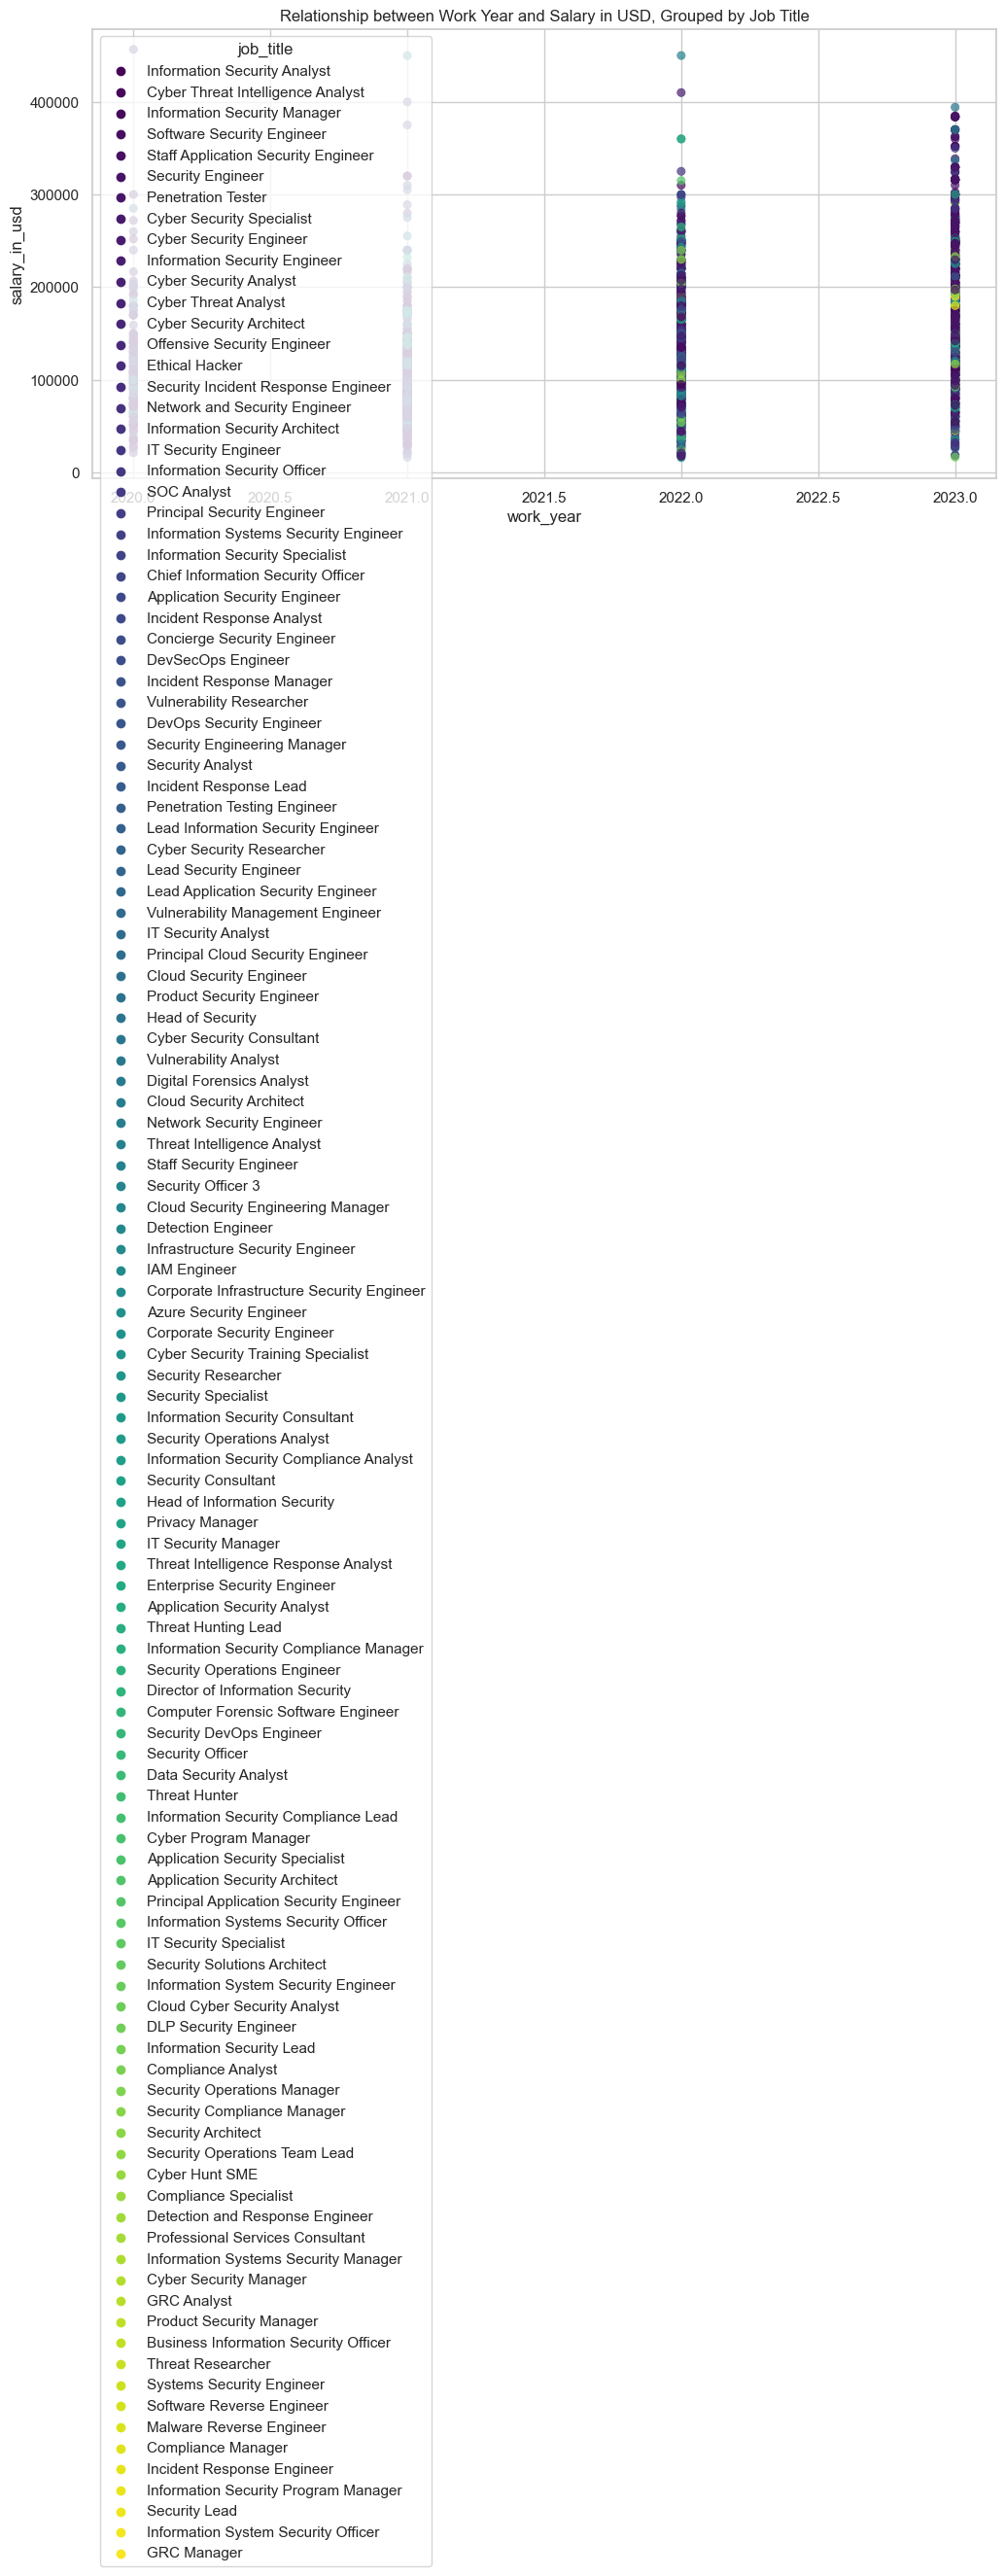

In [18]:
# Set the background and aesthetics
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))
plt.title("Relationship between Work Year and Salary in USD, Grouped by Job Title")

# Create the scatter plot with 'job_title' as hue
sns.scatterplot(x='work_year', y='salary_in_usd', hue='job_title', data=df, alpha=0.7, edgecolor=None, palette='viridis')

# Display the plot
plt.show()


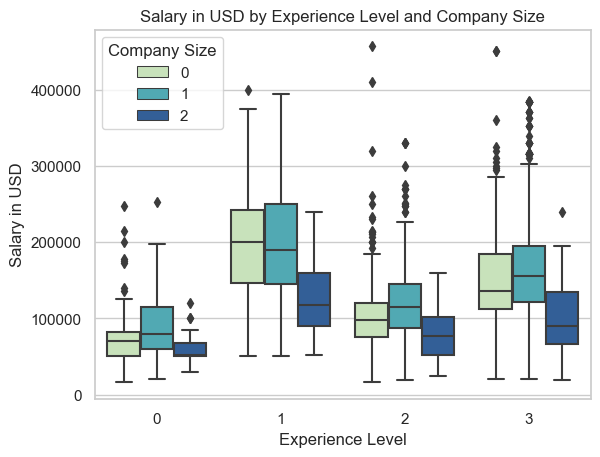

In [87]:

# Create a boxplot for 'experience_level' vs 'salary_in_usd'
# Use 'company_size' as hue to categorize data further
# Use a color palette for visual appeal
sns.boxplot(x='experience_level', y='salary_in_usd', data=df, hue='company_size', palette='YlGnBu')

# Add title and labels
plt.title('Salary in USD by Experience Level and Company Size')
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')

# Show legend with title
plt.legend(title='Company Size')

# Show the plot
plt.show()



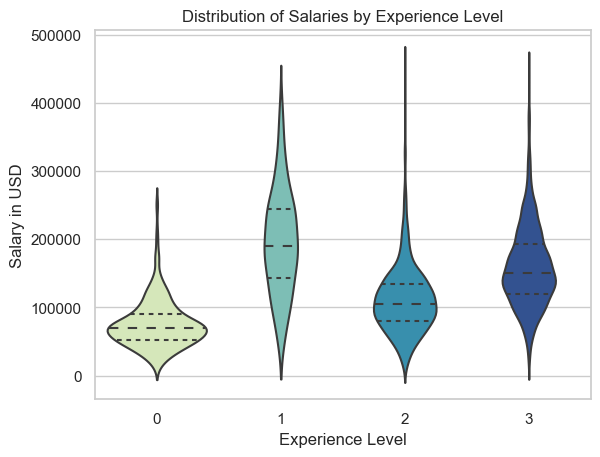

In [93]:
# Create the violinplot
sns.violinplot(x='experience_level', y='salary_in_usd', data=df, palette='YlGnBu', inner='quartile')

# Add title and labels
plt.title('Distribution of Salaries by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')

# Show the plot
plt.show()



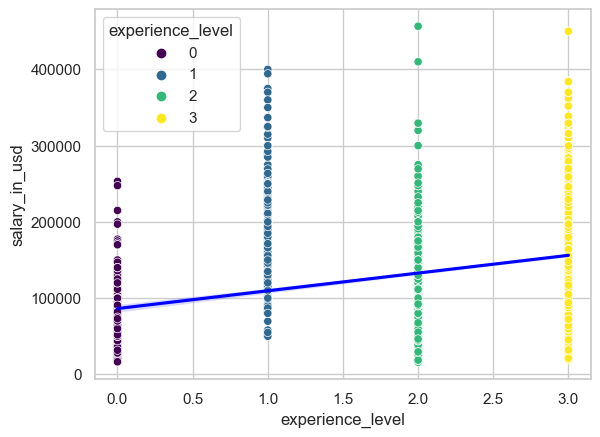

In [97]:
# Generate a regression plot
sns.regplot(x='experience_level', y='salary_in_usd', data=df, fit_reg=True, scatter=False, color='blue')

# Overlay a scatterplot with a palette
sns.scatterplot(x='experience_level', y='salary_in_usd', data=df, hue='experience_level', palette="viridis")

plt.show()




C:\Users\segal\AppData\Local\Temp\ipykernel_18464\1489223751.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(x='experience_level', y='salary_in_usd', data=df, palette="YlGnBu")
C:\Users\segal\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 41.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\segal\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 59.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\segal\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 78.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\segal\

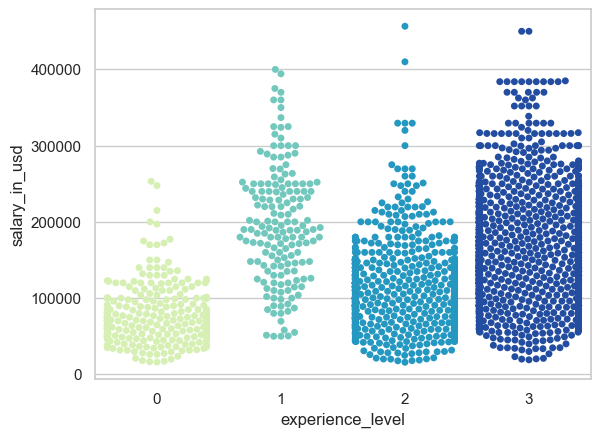

In [92]:
sns.swarmplot(x='experience_level', y='salary_in_usd', data=df, palette="YlGnBu")
plt.show()



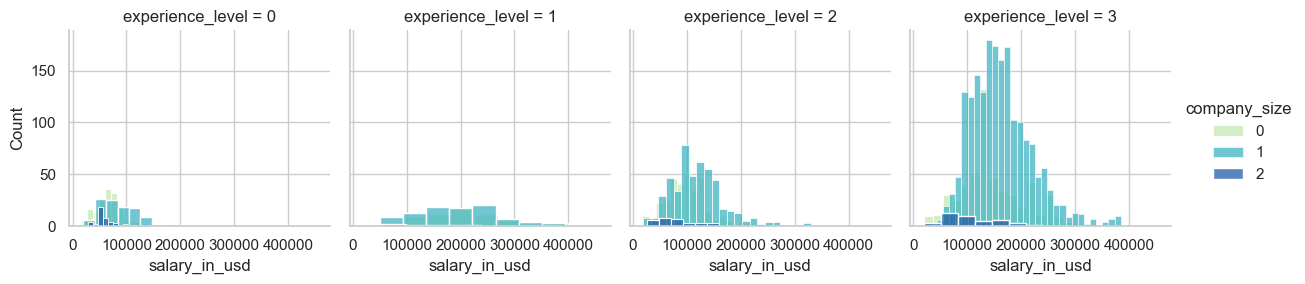

In [91]:
g = sns.FacetGrid(df, col='experience_level', hue='company_size', palette="YlGnBu")
g.map(sns.histplot, 'salary_in_usd')
g.add_legend()


 ![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

# Model Selection

#### Tree-Based Models - Tree-based models were chosen for the salaries dataset primarily because they offer a balance between interpretability and predictive power. These models excel at handling both categorical and numerical data, making them ideal for a dataset that likely includes a variety of feature types. Their ability to capture non-linear relationships provides an additional layer of accuracy that linear models might miss. Another compelling reason is the way tree-based models, particularly ensemble methods like Random Forest and Gradient Boosting, provide insights into the importance of individual features. Knowing what contributes most to salary estimations can be critical for both individuals and organizations. These models are also robust, capable of handling outliers and imbalanced datasets well, characteristics often found in real-world salary data. Additionally, advanced tree-based models come with built-in mechanisms for avoiding overfitting, such as pruning and random feature selection, making them particularly robust for this application. Ease of use is another consideration; tree-based models generally require less data preprocessing, are tolerant of missing values, and don't require feature scaling.


### Model 1: Decision Tree Regressor



In [27]:
# Initialize the Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
dt_regressor.fit(X_train_encoded, y_train)


DecisionTreeRegressor(random_state=42)

In [28]:
# Make predictions
y_train_pred = dt_regressor.predict(X_train_encoded)
y_test_pred = dt_regressor.predict(X_test_encoded)


In [29]:
# Evaluate the model
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Training MSE: {mse_train}, R²: {r2_train}")
print(f"Test MSE: {mse_test}, R²: {r2_test}")


Training MSE: 17384.361591131397, R²: 0.9999955990034284
Test MSE: 290466513.69491524, R²: 0.9335130221518713


#### The training MSE (Mean Squared Error) and R 2 score indicate that the model is fitting the training data almost perfectly. But this is a sign of overfitting. Overfitting is when the model learns the training data too well, including its noise and outliers, but does not generalize well to new, unseen data.The test MSE is significantly higher than the training MSE, and although the R2 score on the test set is still high (indicating a generally good fit), the disparity between the training and test metrics confirms that the model is overfitting so next I will be doing cross-validation to get a more accurate assessment of the model's performance on unseen data.

 

####  1.1 Cross-Validation 

In [30]:

# Initialize the Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)

In [32]:
# Define scoring methods
scoring_metrics = {'mse': make_scorer(mean_squared_error, greater_is_better=False),
                   'mae': make_scorer(mean_absolute_error, greater_is_better=False),
                   'r2': 'r2'}

In [33]:
# Perform 10-fold cross-validation
cv_scores = cross_validate(dt_regressor, X_train_encoded, y_train, cv=10, scoring=scoring_metrics)

# Since we used loss functions where lower values are better, negate the MSE and MAE scores to make them consistent with R2
cv_scores['test_mse'] = -cv_scores['test_mse']
cv_scores['test_mae'] = -cv_scores['test_mae']

In [34]:
# Calculate mean and standard deviation for each metric
mse_mean = np.mean(cv_scores['test_mse'])
mse_std = np.std(cv_scores['test_mse'])

mae_mean = np.mean(cv_scores['test_mae'])
mae_std = np.std(cv_scores['test_mae'])

r2_mean = np.mean(cv_scores['test_r2'])
r2_std = np.std(cv_scores['test_r2'])

print(f"Cross-validation Metrics:")
print(f"MSE: Mean = {mse_mean}, Std = {mse_std}")
print(f"MAE: Mean = {mae_mean}, Std = {mae_std}")
print(f"R2: Mean = {r2_mean}, Std = {r2_std}")

Cross-validation Metrics:
MSE: Mean = 547885630.0411518, Std = 556085613.7899767
MAE: Mean = 3717.47551946946, Std = 1649.6245984589987
R2: Mean = 0.8633794571949217, Std = 0.14092810033791714


#### The cross-validation results indicate that the Decision Tree Regressor model is not as good as initially thought based on the R² value from the initial single train-test split evaluation. Let's discuss the metrics: MSE (Mean Squared Error): The mean MSE value during cross-validation is approximately 547,885,630 with a high standard deviation (556,085,614), which indicates that the model's performance varies significantly across different subsets of the data.MAE (Mean Absolute Error): The mean MAE is about 3717 with a standard deviation of 1649, which is relatively high. This means that the model can, on average, predict salaries with an error of approximately 3717 (USD), and this error differs by about 1649 (USD). The average R² value is around 0.863 with a standard deviation of 0.141. This suggests that the model explains about 86.3% of the variance in the target variable on average, which seems decent. However, the high standard deviation suggests that this performance is inconsistent across different subsets of the data. Here's a quick analysis based on these metrics-Overfitting: The single-split metrics suggested an almost perfect model, but the cross-validation metrics indicate otherwise. This is a strong signal that the model is overfitting, especially considering the high standard deviation for MSE and R². Inconsistency: The high standard deviation in all three metrics suggests that the model's performance is highly sensitive to the specific data it's trained on.

### Model 2: Random Forest Model 


In [39]:
# Initialize the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

In [36]:
# Train the model
rf.fit(X_train_encoded, y_train)

RandomForestRegressor(random_state=42)

In [37]:
# Predictions
train_preds = rf.predict(X_train_encoded)
test_preds = rf.predict(X_test_encoded)

In [38]:
# Evaluation
print(f"Training MSE: {mean_squared_error(y_train, train_preds)}, R²: {r2_score(y_train, train_preds)}")
print(f"Test MSE: {mean_squared_error(y_test, test_preds)}, R²: {r2_score(y_test, test_preds)}")

# Cross-validation
cross_val_mse = cross_val_score(rf, X_train_encoded, y_train, cv=5, scoring='neg_mean_squared_error')
cross_val_mae = cross_val_score(rf, X_train_encoded, y_train, cv=5, scoring='neg_mean_absolute_error')
cross_val_r2 = cross_val_score(rf, X_train_encoded, y_train, cv=5, scoring='r2')

print(f"Cross-validation Metrics:")
print(f"MSE: Mean = {-cross_val_mse.mean()}, Std = {cross_val_mse.std()}")
print(f"MAE: Mean = {-cross_val_mae.mean()}, Std = {cross_val_mae.std()}")
print(f"R2: Mean = {cross_val_r2.mean()}, Std = {cross_val_r2.std()}")

Training MSE: 23868829.955639888, R²: 0.9939574060139076
Test MSE: 269604520.3609652, R²: 0.9382882744555464
Cross-validation Metrics:
MSE: Mean = 279658067.9235259, Std = 235335548.21950215
MAE: Mean = 3122.1867169191582, Std = 785.649024042955
R2: Mean = 0.9312239842238617, Std = 0.056142663843989526


### Model 3: Gradient Booster Regressor

In [40]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the model
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)

In [41]:
# Train the model
gb.fit(X_train_encoded, y_train)

GradientBoostingRegressor(random_state=42)

In [42]:
# Predictions
train_preds = gb.predict(X_train_encoded)
test_preds = gb.predict(X_test_encoded)

In [43]:
# Evaluation
print(f"Training MSE: {mean_squared_error(y_train, train_preds)}, R²: {r2_score(y_train, train_preds)}")
print(f"Test MSE: {mean_squared_error(y_test, test_preds)}, R²: {r2_score(y_test, test_preds)}")

# Cross-validation
cross_val_mse = cross_val_score(gb, X_train_encoded, y_train, cv=5, scoring='neg_mean_squared_error')
cross_val_mae = cross_val_score(gb, X_train_encoded, y_train, cv=5, scoring='neg_mean_absolute_error')
cross_val_r2 = cross_val_score(gb, X_train_encoded, y_train, cv=5, scoring='r2')

print(f"Cross-validation Metrics:")
print(f"MSE: Mean = {-cross_val_mse.mean()}, Std = {cross_val_mse.std()}")
print(f"MAE: Mean = {-cross_val_mae.mean()}, Std = {cross_val_mae.std()}")
print(f"R2: Mean = {cross_val_r2.mean()}, Std = {cross_val_r2.std()}")

Training MSE: 45842106.45592052, R²: 0.988394687242937
Test MSE: 281073559.12082225, R²: 0.9356630433531177
Cross-validation Metrics:
MSE: Mean = 279038850.3841254, Std = 195125340.15544084
MAE: Mean = 3977.935813660361, Std = 665.8495681646306
R2: Mean = 0.9308815146691198, Std = 0.0457602726265053


In [46]:
# Fit the Decision Tree model
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train_encoded, y_train)


DecisionTreeRegressor(random_state=42)

In [47]:
# Fit the Random Forest model
random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train_encoded, y_train)


RandomForestRegressor(random_state=42)

In [48]:
# Fit the Gradient Boosting model
gradient_boosting_model = GradientBoostingRegressor(random_state=42)
gradient_boosting_model.fit(X_train_encoded, y_train)


GradientBoostingRegressor(random_state=42)

In [49]:
# For Decision Tree
feature_importances_dt = decision_tree_model.feature_importances_

# For Random Forest
feature_importances_rf = random_forest_model.feature_importances_

# For Gradient Boosting
feature_importances_gb = gradient_boosting_model.feature_importances_

features = X.columns

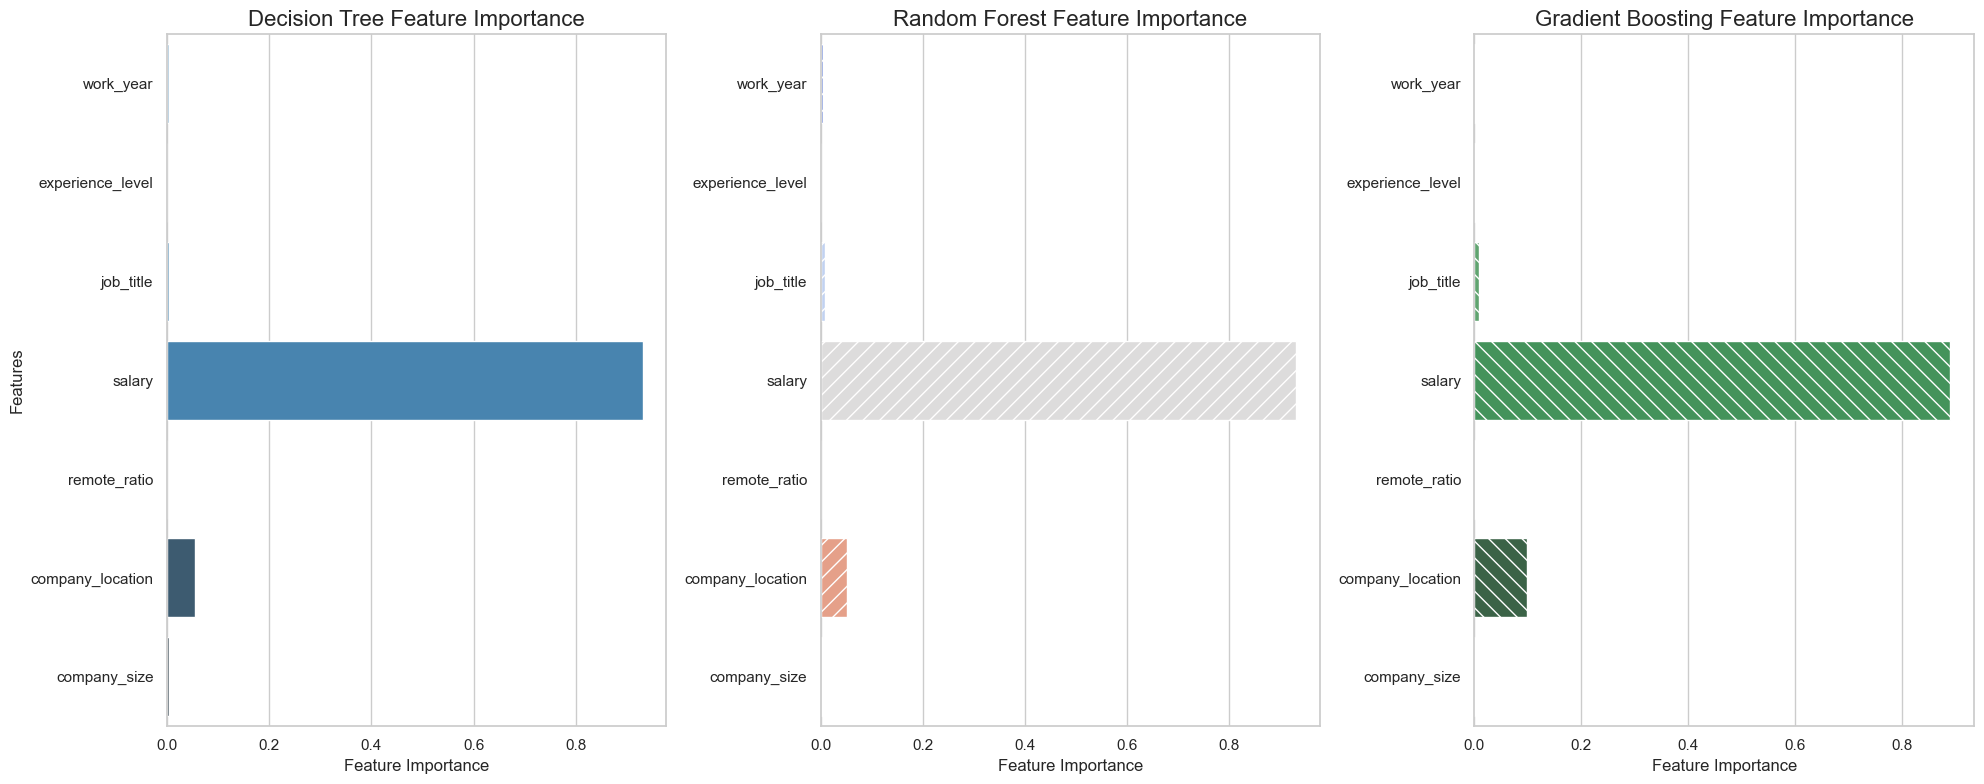

In [55]:
# Set up the matplotlib figure
plt.figure(figsize=(20, 8))

features = ['work_year', 'experience_level', 'job_title', 'salary', 'remote_ratio', 'company_location', 'company_size']

# Plotting Decision Tree Feature Importance
plt.subplot(1, 3, 1)
sns.barplot(x=feature_importances_dt, y=features, palette='Blues_d')
plt.title('Decision Tree Feature Importance', fontsize=16)
plt.xlabel('Feature Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)

# Plotting Random Forest Feature Importance
plt.subplot(1, 3, 2)
sns.barplot(x=feature_importances_rf, y=features, palette='coolwarm', hatch='//')
plt.title('Random Forest Feature Importance', fontsize=16)
plt.xlabel('Feature Importance', fontsize=12)
plt.ylabel('')

# Plotting Gradient Boosting Feature Importance
plt.subplot(1, 3, 3)
sns.barplot(x=feature_importances_gb, y=features, palette='Greens_d', hatch='\\\\')
plt.title('Gradient Boosting Feature Importance', fontsize=16)
plt.xlabel('Feature Importance', fontsize=12)
plt.ylabel('')

plt.tight_layout()
plt.show()


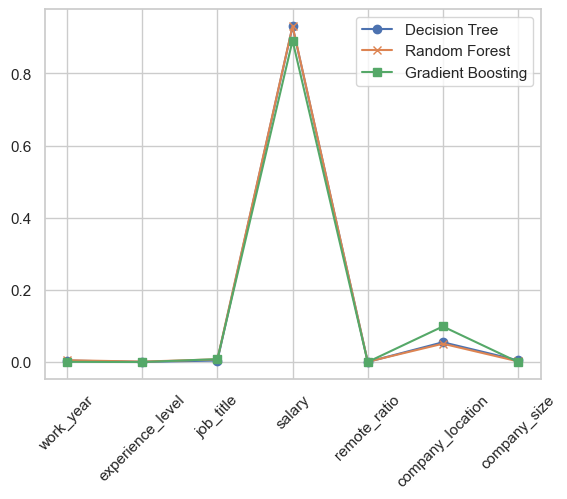

In [107]:
plt.plot(features, feature_importances_dt, marker='o', label='Decision Tree')
plt.plot(features, feature_importances_rf, marker='x', label='Random Forest')
plt.plot(features, feature_importances_gb, marker='s', label='Gradient Boosting')
plt.xticks(rotation=45)
plt.legend()
plt.show()


#### The Gradient Boosting Regressor also shows strong performance metrics, although it too appears to be overfitting the training data to some degree, as indicated by the difference in MSE between the training and test sets. However, compared to the Random Forest model, the Gradient Boosting model seems to be somewhat less overfit. This is indicated by a smaller difference between the training and test MSE,  a slightly lower R² on the training set- which suggests that it hasn't "memorized" the training data to the same extent as the Random Forest and cross-validation metrics that are closer to the test set metrics- suggesting that the model's performance is more stable across different subsets of the data.Given these results, the Gradient Boosting model seems to be the better of the two, although there's still room for improvement to reduce overfitting. 

 ![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

# Reflection
In this assignment I chose supervised learning because the salaries dataset came with a target variable, salary in USD, making it ideal for supervised learning. With this labeled data, it became possible to train a machine learning model to comprehend the relationship between various features such as experience level, job title, and company location and the corresponding salary. The primary objective of the project was to predict salary, and supervised learning is particularly effective when the focus is on predictive modeling and the outcome variable is already known.Also, supervised learning allowed for the model's performance to be quantitatively evaluated. Metrics like Mean Squared Error (MSE) and R-squared give a clear indication of how well the model is performing and the areas that could benefit from improvement. This aspect of supervised learning is complemented by the interpretability of features that certain algorithms like decision trees and ensemble methods such as random forests provide. These algorithms can identify and rank the importance of features, offering invaluable insights into the factors that most influence salary levels.
### Data Cleaning and Preprocessing
The following is a brief of what occurred in data cleaning: 
I read the csv file and went on to check missing values of which i found none. 
The salary_currency column was removed from the DataFrame because since I already have the salary_in_usd column, the information in salary_currency may be redundant for machine learning purposes, so dropping it can simplify the dataset. The employment_type column in the dataset had the same value for all rows (i.e., everyone is full-time), so it won't contribute any meaningful information to the machine-learning models. In this case, it was generally a good idea to drop the column because a feature that doesn't vary between observations cannot improve the model's performance, as it doesn't help the model distinguish between different observations. The employee_residence column was removed because it also would not assist in solving the problem statement. The scaler (scaler) was added to the data cleaning step and is fitted only on X_train_encoded. Then, it was used to transform both X_train_encoded and X_test_encoded. This ensures that the test data is transformed exactly the same way as the training data, making the evaluation metrics possibly more reliable. 
-I opted to use label encoding for certain categorical features like experience_level and company_size. Label encoding was chosen because these features have a natural order to them; higher levels of experience or larger company sizes could potentially have a more significant impact on the target variable, which is salary_in_usd. By converting these ordinal categories to numerical labels, I made it easier for the machine learning models to understand and use this order-based relationship during training. This preprocessing step is essential for algorithms that require numerical input, like Decision Trees and Random Forests, allowing them to make more accurate predictions.
- Target Encoding: so the dataset contained categorical variables like 'job_title' and 'company_location' that couldn't be fed directly into machine learning models, which require numerical input. Target encoding was used as it often performs well with high cardinality features, capturing information within numerous categories based on their relation to the target variable ('salary_in_usd'). So by using the TargetEncoder from the category_encoders library, I firstly fit the encoder using the training data to avoid data leakage. I then transformed the specific categorical columns in both training and test datasets, replacing each category with the mean of the target variable for that category. This way, the encoded variables maintain a relationship with the target variable.
- Standardization: features like 'experience_level,' 'company_size,' and 'remote_ratio' were numerical but had different units and scales. Standardizing these features meant that they changed to have a mean of 0 and a standard deviation of 1, making it easier for the machine learning models to compare them and ensuring that no variable artificially inflates its importance. I did so by employing the StandardScaler from the sklearn.preprocessing library to standardize the numerical variables. The scaler was fit only on the training data to avoid data leakage and was then applied to both the training and test datasets.


### Exploratory Data Analysis (EDA)
Boxplot -I used a boxplot to visualize the distribution of salaries across different experience levels. This helped to identify outliers and the interquartile range of the salary for each experience level.

Violin Plot- Similar to the boxplot but with a kernel density estimation, the violin plot gave me more information about the density of the data points at different salary levels for each experience category.

Facet Grid with Histogram - By breaking down the data by experience level and plotting histograms, I was able to see the distribution of salaries within each experience level.

Swarm Plot - This plot gave me a better understanding of the spread of data points within each experience level, showing the distribution and density of the salary points for each level.

Regression Plot- A regression plot of experience level against salary in USD helped to visualize the trend and relationship between experience and salary, providing a line of best fit along with scatter points.

Pair Plot- A pair plot (or scatterplot matrix) was generated to show pairwise relationships between all numerical variables, colored by experience level. This helped me understand the correlations between different variables in the dataset.

Histogram of Target Variable - I also examined the overall distribution of the target variable 'salary_in_usd', which provided a high-level overview of salary distribution across all data points.

These visualizations were essential in understanding the underlying patterns and structures in the data, aiding in feature selection and model building.

### Results from three tree-based model
#### Decision Tree Regressor
Training Metrics:
MSE (Mean Squared Error): 17,384.36
R² (Coefficient of Determination): 0.9999955990034284
Test Metrics:
MSE: 290,466,513.69
R²: 0.9335130221518
Cross-Validation: Showed substantial overfitting with a large variance in MSE across folds.
#### Random Forest Regressor
Training Metrics:
MSE: 23,868,829.95
R²: 0.9939574060139076
Test Metrics:
MSE: 269,604,520.36
R²: 0.9382882744555464
#### Gradient Boosting Regressor
Training Metrics:
MSE: 45,842,106.45
R²: 0.988394687242937
Test Metrics:
MSE: 281,073,559.12
R²: 0.9356630433531177
Cross-Validation Metrics:
MSE: Mean = 279,038,850.38, Std = 195,125,340.15
MAE (Mean Absolute Error): Mean = 3,977.93, Std = 665.85
R²: Mean = 0.9308815146691198, Std = 0.0457602726265053
#### Observations:
Overfitting: The Decision Tree model showed a considerable amount of overfitting, with nearly perfect scores on the training set but a significantly worse performance on the test set.

Random Forest vs Gradient Boosting: Both ensemble methods improved performance compared to the single Decision Tree model. Random Forest and Gradient Boosting had similar performance metrics, but Random Forest had a slightly better R² score on the test set.

Cross-Validation: The cross-validation results for the Gradient Boosting Regressor indicated good generalization performance with a mean R² of 0.931 and a relatively low standard deviation.

Regularization: Gradient Boosting offers options for further regularization, which could be explored to reduce overfitting further. 

In summary, ensemble methods like Random Forest and Gradient Boosting provided better and more reliable performance than a single Decision Tree. Further steps could involve tuning hyperparameters and applying regularization techniques to improve these models further.
#### What I learnt:
Before I reached and submitted my final version of the machine learning assignment, I underwent much difficulty from finding the most suitable dataset to complete this assignment. It was my first machine learning project, which focused on a salaries dataset, I gained a range of valuable skills and insights that will undoubtedly serve as a solid foundation for my future work in this field. One of the initial, yet critical, steps was getting to understand the data I was working with. This involved loading the dataset, examining its shape, and getting acquainted with its various features. Following this, I delved into data cleaning and preprocessing. This crucial stage involved handling missing values, encoding categorical variables using techniques such as label encoding and target encoding, and standardizing features to prepare them for machine learning models. I learned that sometimes the dataset itself can be a challenge. Whether it's due to being unbalanced, sparse, or even too small, learning to work with imperfect data has been a valuable lesson in itself.

#### Future Imrpovements
-Investigate creating new features or transforming existing ones to improve model performance. For instance, combining or binning certain categorical values might yield better insights.

-Systematically search for the best hyperparameters using methods like grid search or random search, especially for complex models like Gradient Boosting.

-Experiment with other algorithms not covered in this assignment, such as Support Vector Machines, Neural Networks, or XGBoost, to see if they offer performance improvements.

-Consider using AutoML tools to automatically explore various algorithms, feature engineering techniques, and hyperparameters.

-Implement a systematic approach to feature selection to eliminate redundant or unimportant features, which can improve model performance and speed up training

######### References:
Dataset source: https://www.reddit.com/r/datasets/comments/165jqz4/dataset_of_cybersecurity_salaries_in_the_public/
Direct source: https://www.reddit.com/r/datasets/comments/165jqz4/dataset_of_cybersecurity_salaries_in_the_public/

OpenAI. (2021). Information obtained through interaction with ChatGPT-4, a machine learning model. Personal communication.



 ![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)